# 1. Defining Problem Statement, Importing the Data and Data Structure Analysis

## Problem Statement

Porter — India’s largest intra-city logistics marketplace — aims to provide accurate delivery time estimates to customers when they order food through partnered restaurants. Currently, delivery time can vary depending on:

The restaurant location and category,

The number and type of items ordered,

The availability and workload of delivery partners,

The time of day or day of the week.

Hence, the goal is to build a regression model that predicts the delivery time (in minutes) for each order based on various order-level and operational factors.

## Importing The Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"data\data.csv")

# Basic info
print("Shape:", df.shape)
df.info()

Shape: (175777, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price              

## Data Structure Analysis

In [2]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
market_id,175777.0,NaN,NaN,NaN,2.743726,1.330963,1.0,2.0,2.0,4.0,6.0
created_at,175777,162649,2015-02-11 19:50:43,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,175777,160344,2015-02-14 02:58:40,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_primary_category,175777.0,NaN,NaN,NaN,35.887949,20.728254,0.0,18.0,38.0,55.0,72.0
order_protocol,175777.0,NaN,NaN,NaN,2.911752,1.513128,1.0,1.0,3.0,4.0,7.0
total_items,175777.0,NaN,NaN,NaN,3.204976,2.674055,1.0,2.0,3.0,4.0,411.0
subtotal,175777.0,NaN,NaN,NaN,2697.111147,1828.554893,0.0,1412.0,2224.0,3410.0,26800.0
num_distinct_items,175777.0,NaN,NaN,NaN,2.67506,1.625681,1.0,1.0,2.0,3.0,20.0
min_item_price,175777.0,NaN,NaN,NaN,684.965433,519.882924,-86.0,299.0,595.0,942.0,14700.0
max_item_price,175777.0,NaN,NaN,NaN,1160.158616,560.828571,0.0,799.0,1095.0,1395.0,14700.0


In [3]:
df.nunique()

market_id                                            6
created_at                                      162649
actual_delivery_time                            160344
store_primary_category                              73
order_protocol                                       7
total_items                                         54
subtotal                                          8182
num_distinct_items                                  20
min_item_price                                    2251
max_item_price                                    2585
total_onshift_dashers                              172
total_busy_dashers                                 158
total_outstanding_orders                           281
estimated_store_to_consumer_driving_duration      1318
dtype: int64

In [4]:
pd.to_datetime(df['created_at']).min(), pd.to_datetime(df['created_at']).max()
pd.to_datetime(df['actual_delivery_time']).min(), pd.to_datetime(df['actual_delivery_time']).max()

(Timestamp('2015-01-21 16:07:03'), Timestamp('2015-02-18 06:51:10'))

# 2. Data Preprocessing and Feature Engineering 

## 2.1 Data cleaning

In [5]:
# Convert timestamps
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

# Drop rows where timestamps are invalid or missing
df = df.dropna(subset=['created_at', 'actual_delivery_time'])

# Remove records where delivery time is before order placement
df = df[df['actual_delivery_time'] > df['created_at']]

print("Remaining records after cleaning:", df.shape)

Remaining records after cleaning: (175777, 14)


## 2.2 Null Value Handling

In [9]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [6]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric nulls
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical nulls
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('unknown', inplace=True)

## 2.3 Creating the Target Column (Time Taken for Delivery) From Order Timestamp and Delivery Timestamp

In [7]:
df['delivery_time_minutes'] = (
    df['actual_delivery_time'] - df['created_at']
).dt.total_seconds() / 60
df = df[df['delivery_time_minutes'] > 0]

## 2.4 Getting Hour and Day of The Week

In [8]:
# Extract hour of order placement
df['order_hour'] = df['created_at'].dt.hour

# Extract day of week (0 = Monday, 6 = Sunday)
df['order_weekday'] = df['created_at'].dt.weekday

## 2.5 Encoding Categorical Column

In [9]:
# Select relevant categorical columns
cat_features = ['store_primary_category', 'order_protocol']

# Convert order_protocol to string if not already
df['order_protocol'] = df['order_protocol'].astype(str)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [10]:
print("Final Shape:", df_encoded.shape)
df_encoded.head()

Final Shape: (175777, 93)


,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_69,store_primary_category_70,store_primary_category_71,store_primary_category_72,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,3441,4,557,1239,33.0,14.0,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,1,1900,1,1400,1400,1.0,2.0,...,False,False,False,False,True,False,False,False,False,False
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,4,4771,3,820,1604,8.0,6.0,...,False,False,False,False,False,True,False,False,False,False
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,1,1525,1,1525,1525,5.0,6.0,...,False,False,False,False,False,False,False,False,False,False
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,2,3620,2,1425,2195,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False


# 3. Data Visualization and Cleaning

## 3.1 Visualization for Various Features

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')

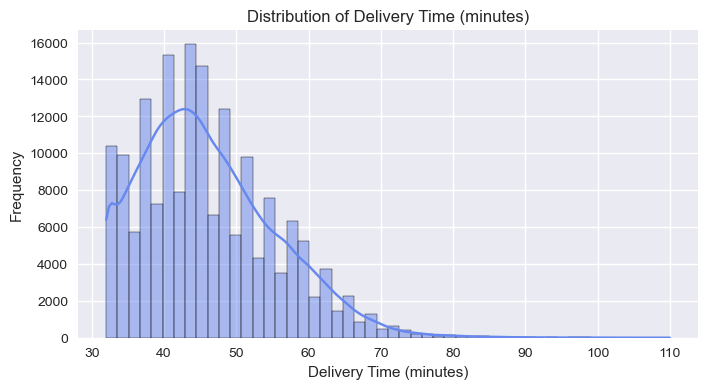

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['delivery_time_minutes'], bins=50, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.savefig("figures\Distribution_of_Delivery_Time_in_minutes.png")
plt.show()

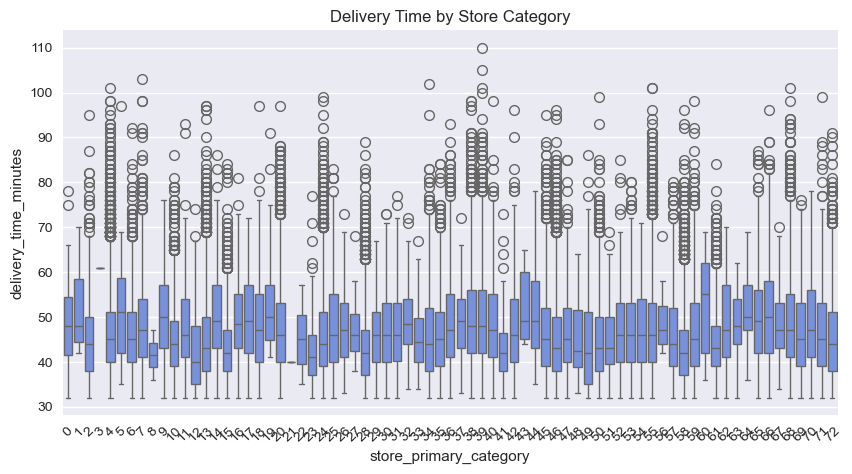

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='store_primary_category', y='delivery_time_minutes', data=df)
plt.xticks(rotation=45)
plt.title("Delivery Time by Store Category")
plt.savefig("figures\Delivery_Time_by_Store_Category.png")
plt.show()

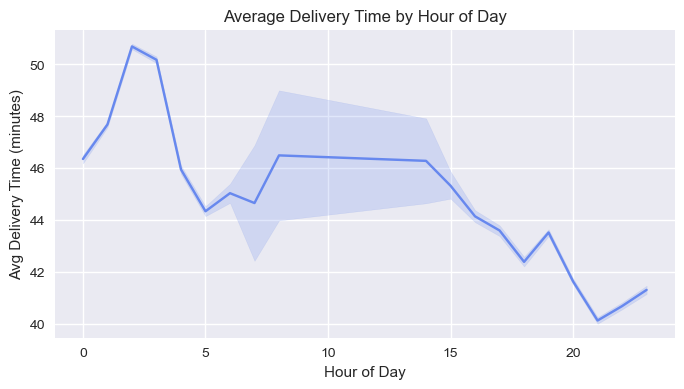

In [19]:
plt.figure(figsize=(8,4))
sns.lineplot(x='order_hour', y='delivery_time_minutes', data=df)
plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Delivery Time (minutes)")
plt.savefig("figures\Average_Delivery_Time_by_Hour_of_Day.png")
plt.show()

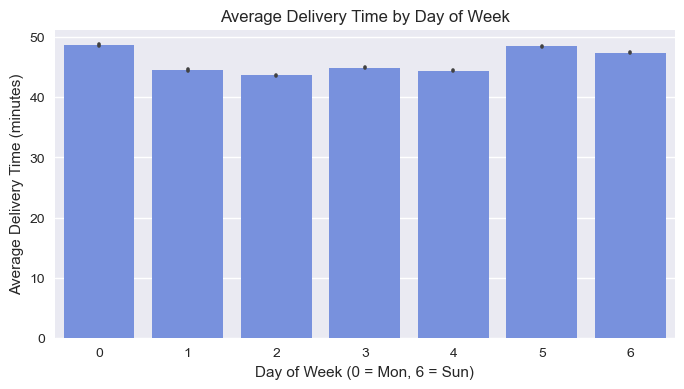

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='order_weekday', y='delivery_time_minutes', data=df, estimator='mean')
plt.title("Average Delivery Time by Day of Week")
plt.xlabel("Day of Week (0 = Mon, 6 = Sun)")
plt.ylabel("Average Delivery Time (minutes)")
plt.savefig("figures\Average_Delivery_Time_by_Day_of_Week.png")
plt.show()

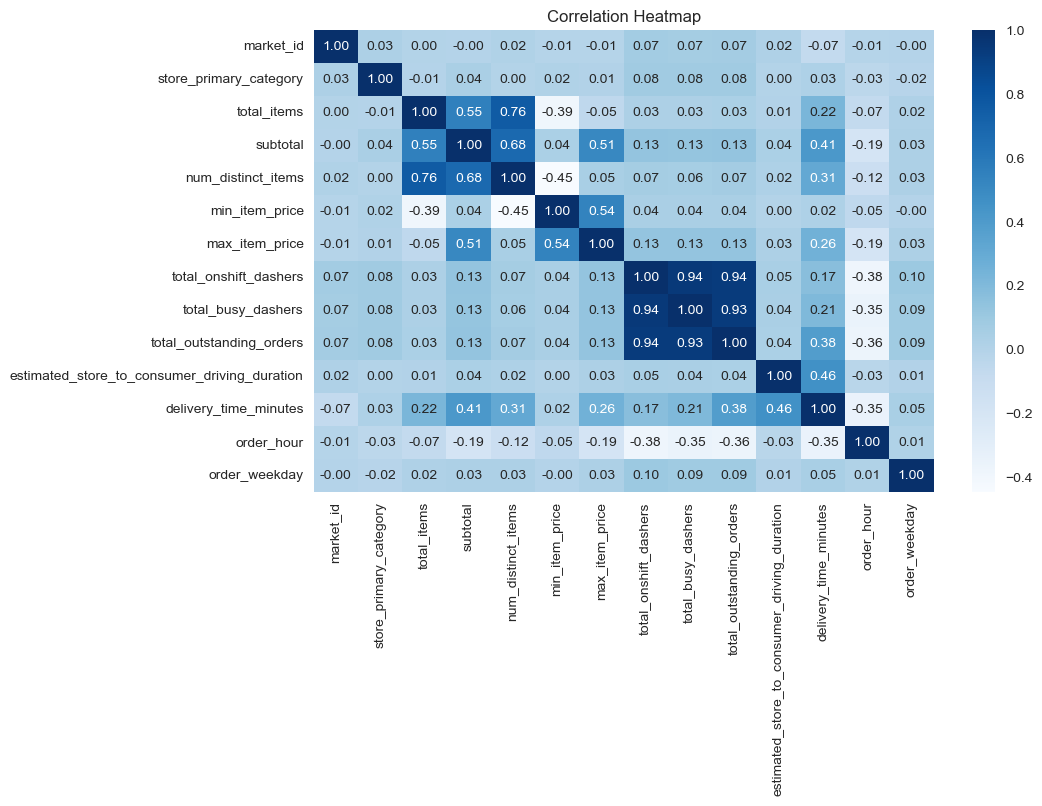

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap")
plt.savefig("figures\Correlation_Heatmap.png")
plt.show()

## 3.2 Check for Outliers

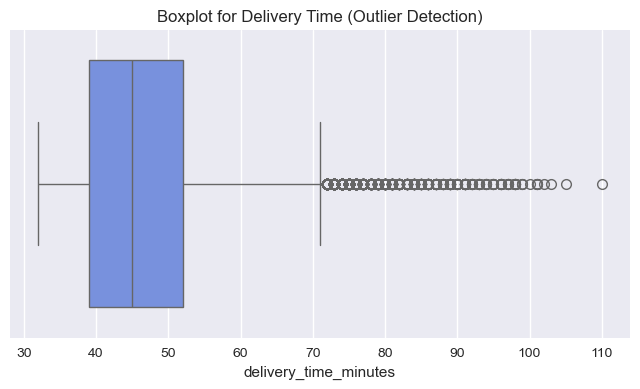

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['delivery_time_minutes'])
plt.title("Boxplot for Delivery Time (Outlier Detection)")
plt.savefig("figures\Boxplot_for_Delivery_Time_Outlier_Detection.png")
plt.show()

## 3.3 Remove Outliers

In [23]:
Q1 = df['delivery_time_minutes'].quantile(0.25)
Q3 = df['delivery_time_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset
df_cleaned = df[(df['delivery_time_minutes'] >= lower_bound) &
                (df['delivery_time_minutes'] <= upper_bound)]

print("Before cleaning:", df.shape)
print("After cleaning:", df_cleaned.shape)

Before cleaning: (175777, 17)
After cleaning: (174028, 17)


## 3.4 Compare Plots and Results

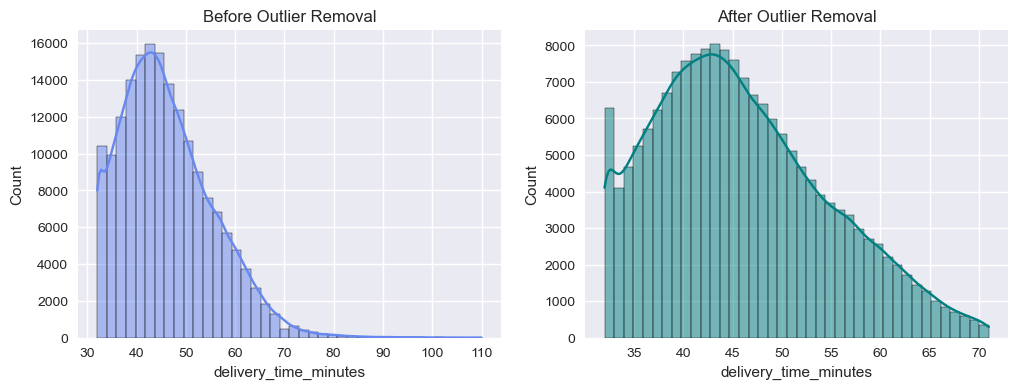

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['delivery_time_minutes'], bins=40, ax=axes[0], kde=True)
axes[0].set_title("Before Outlier Removal")

sns.histplot(df_cleaned['delivery_time_minutes'], bins=40, ax=axes[1], kde=True, color='teal')
axes[1].set_title("After Outlier Removal")
plt.savefig("figures\Distribution_of_delivery_time_minutes_Before_and_After_Outlier_Removal.png")
plt.show()

# 4. Regression with Neural Networks

## 4.1 Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns (timestamps not needed for modeling)
X = df_cleaned.drop(['created_at', 'actual_delivery_time', 'delivery_time_minutes'], axis=1)
y = df_cleaned['delivery_time_minutes']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (139222, 14)
Test shape: (34806, 14)


## 4.2 Data Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.3 Training a Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf:.2f} minutes")
print(f"Random Forest RMSE: {rmse_rf:.2f} minutes")

Random Forest MAE: 2.78 minutes
Random Forest RMSE: 3.68 minutes


## 4.4 Defining NN Architecture

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

# Define model
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer (continuous)
])

# Compile model
nn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

nn_model.summary()

C:\Users\chasm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4.5 Trying Different Combinations and Hyperparameters

In [30]:
nn_model2 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

nn_model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

C:\Users\chasm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.6 Model Training

In [31]:
history = nn_model2.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1
)

Epoch 1/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 51.4804 - mae: 3.8281 - mse: 51.4804 - val_loss: 2.9506 - val_mae: 1.2696 - val_mse: 2.9506
Epoch 2/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.3209 - mae: 1.7122 - mse: 5.3209 - val_loss: 0.9438 - val_mae: 0.7233 - val_mse: 0.9438
Epoch 3/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.7915 - mae: 1.2451 - mse: 2.7915 - val_loss: 1.0908 - val_mae: 0.8652 - val_mse: 1.0908
Epoch 4/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6926 - mae: 0.9470 - mse: 1.6926 - val_loss: 0.5961 - val_mae: 0.5862 - val_mse: 0.5961
Epoch 5/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2178 - mae: 0.8128 - mse: 1.2178 - val_loss: 0.3786 - val_mae: 0.4733 - val_mse: 0.3786
Epoch 6/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2470 - mae: 0.7469 - mse: 1.2470 - val_loss: 0.2842 - val_mae: 0.4138 - val_mse: 0.2842
Epoch 7/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9245 - mae: 0.6

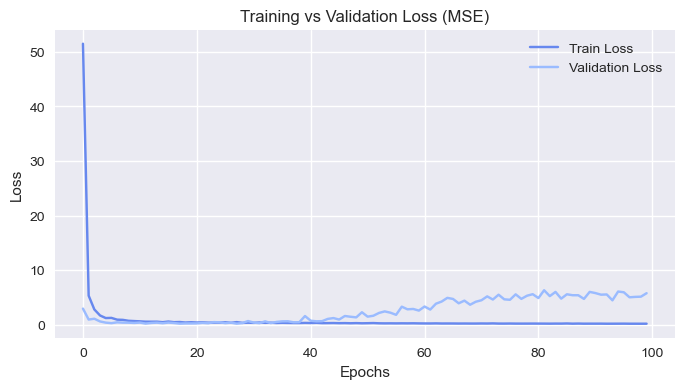

In [32]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("figures\Training_vs_Validation_Loss_MSE.png")
plt.show()

In [33]:
y_pred_nn = nn_model2.predict(X_test_scaled)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print(f"Neural Network MAE: {mae_nn:.2f} minutes")
print(f"Neural Network RMSE: {rmse_nn:.2f} minutes")

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network MAE: 1.95 minutes
Neural Network RMSE: 2.38 minutes


# Leading Questions:

**Q1.** Defining the problem statements and where can this and modifications of this be used?

**Ans -**

**Problem Statement -** Estimate delivery time (in minutes) for each order based on order details, restaurant type, order protocol, partner availability, and travel duration.

**Applications and Extensions:**

-    **Food Delivery Platforms (e.g., Zomato, Swiggy)** — improve customer experience by giving realistic delivery estimates.

-    **E-commerce Logistics** — predict parcel delivery times based on warehouse distance, traffic, and load.

-    **Ride-Hailing / Courier Systems** — estimate pickup/drop times for better route optimization.

-    **Dynamic Resource Allocation** — modify driver assignment logic based on predicted delays.

  
**Q2.** List 3 functions the pandas datetime provides with one line explanation.

**Ans -**

**pd.to_datetime()** - Converts strings or numbers into pandas datetime objects.

**.dt.hour**         - Extracts the hour component from a datetime column.                

**.dt.weekday**      - Returns the day of the week as an integer (0 = Monday, 6 = Sunday). 


**Q3.** Short note on datetime, timedelta, time span (period)

**Ans -**

**datetime:** Represents a specific point in time (date + time). Example: 2025-09-28 14:30:00.

**timedelta:** Represents a duration or difference between two datetimes (e.g., 45 minutes).

**timespan / Period:** Represents a span of time (e.g., a day, month, quarter). Used for time series with fixed frequency.

**Q4.** Why do we need to check for outliers in our data?

**Ans -**
We need to check for outliers in our data for the following reasons:

-    Outliers distort statistical measures (mean, variance) and can mislead model training.

-    In regression, extreme values can pull the prediction line and reduce accuracy.

-    Detecting and handling them ensures a robust, stable, and generalizable model.

**Q5.** Name 3 outlier removal methods?

**Ans -**
3 outlier removal methods:

-    **IQR Method** - Removes points outside 1.5×IQR range from Q1–Q3.
    
-    **Z-score Method** - Removes points with standardized score > 3 or < -3.
    
-    **Percentile Capping** - Trims or caps extreme values beyond chosen percentiles (e.g., 1st–99th).

**Q6.** What classical machine learning methods can we use for this problem?

**Ans -**
Since this is a regression task, suitable models include:

-    **Linear Regression** – establishes a linear relationship between features and target.

-    **Decision Tree Regressor** – handles nonlinear interactions and categorical features.

-    **Random Forest Regressor** – ensemble of trees, robust and accurate for tabular data.

-    **Gradient Boosting / XGBoost** – strong predictive power, handles feature interactions well.

**Q7.** Why is scaling required for neural networks?

**Ans -**
Scaling required for neural networks:

-    Neural networks rely on gradient-based optimization; large feature magnitudes can cause gradients to explode or vanish.

-    Scaling ensures faster convergence, numerical stability, and balanced learning across all features.

-    Standardization (StandardScaler) centers data around 0 mean and unit variance.

**Q8.** Briefly explain your choice of optimizer.

**Ans -**
**Optimizer Used:** Adam (Adaptive Moment Estimation)

**Reason:**

-    Combines benefits of Momentum (faster convergence) and RMSProp (adaptive learning rates).

-    Automatically adjusts learning rate per parameter.

-    Works efficiently for noisy, sparse, and large-scale datasets.

**Q9.** Which activation function did you use and why?

**Ans -**
**Activation:** ReLU (Rectified Linear Unit)

**Reason:**

-    Simple and computationally efficient: ReLU(x) = max(0, x).

-    Helps avoid vanishing gradients, unlike sigmoid/tanh.

-    Encourages sparse activation, improving generalization.

**Q10.** Why does a neural network perform well on a large dataset?

**Ans -**
A neural network perform well on a large dataset because:

-    Neural networks have high representational capacity — they can model complex, nonlinear relationships.

-    Larger datasets reduce overfitting, allowing the model to generalize better.

-    More data improves parameter estimation, feature learning, and robustness to noise.